# Movie Revenue Analysis

## Exploring how budget and other factors influence movie revenue

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
# Read the dataset

df = pd.read_csv(r"C:\Users\nesre\OneDrive\Documents\Python\AI ML Projects\Movie Industry Analysis\data\movies.csv", na_values=["", " ", "N/A", "NA"])

In [3]:
# See what the data looks like

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

* The dataset contains 7,668 rows and 15 columns.

In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
# check for duplicartes
df.duplicated().sum()

np.int64(0)

* No duplicates!

In [8]:
# Missing valus in columns

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [9]:
df.isna().sum().sum()

np.int64(2473)

In [10]:
# Total missing rows

df.isna().any(axis = 1).sum()

np.int64(2247)

In [11]:
# percentage of missing rows

df.isna().any(axis=1).sum()/len(df)*100

np.float64(29.30359937402191)

* Missing Data Overview

The dataset contains a small proportion of missing values across several key variables:

    - Rating: 77 missing values
    - Budget: 2,171 missing values
    - Gross Revenue: 189 missing values
    - Company: 17 missing values
    - Runtime: 4 missing values

    Total missing values: 2473
    Rows having missing value(at least one): 2247 (29.3%)



These missing values are most likely due to information not being publicly disclosed or consistently reported, particularly for budget and revenue figures, which are often unavailable for independent, low-budget, or international productions.

Rather than removing these records upfront, missing values are handled contextually, depending on the specific analysis being performed, to avoid introducing unnecessary bias or reducing dataset representativeness.

In [12]:
df[df.isna().any(axis=1)].head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [13]:
df.sort_values(by=["gross"], inplace=True, ascending=False)
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0


### Revenue Drivers Analysis

Hypothesis

Movies with higher budgets and involvement of certain production companies tend to generate higher gross revenue.

#### Correlation Analysis (Numeric Variables)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7668 entries, 5445 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 958.5+ KB


In [15]:
numeric_df = df[["budget","gross", "score", "votes", "runtime"]].dropna()

In [16]:
numeric_df.head()

,budget,gross,score,votes,runtime
5445,237000000.0,2.847246e+09,7.8,1100000.0,162.0
7445,356000000.0,2.797501e+09,8.4,903000.0,181.0
3045,200000000.0,2.201647e+09,7.8,1100000.0,194.0
6663,245000000.0,2.069522e+09,7.8,876000.0,138.0
7244,321000000.0,2.048360e+09,8.4,897000.0,149.0


In [17]:
# Check for missed values

numeric_df.isna().sum()

budget     0
gross      0
score      0
votes      0
runtime    0
dtype: int64

In [18]:
numeric_df["log_budget"] = np.log10(numeric_df["budget"])
numeric_df["log_gross"] = np.log10(numeric_df["gross"])

* Budget and gross revenue were log-transformed to reduce skewness, mitigate the influence of extreme outliers, and better capture the multiplicative nature of financial relationships in the film industry.


In [19]:
numeric_df.head()

,budget,gross,score,votes,runtime,log_budget,log_gross
5445,237000000.0,2.847246e+09,7.8,1100000.0,162.0,8.374748,9.454425
7445,356000000.0,2.797501e+09,8.4,903000.0,181.0,8.551450,9.446770
3045,200000000.0,2.201647e+09,7.8,1100000.0,194.0,8.301030,9.342748
6663,245000000.0,2.069522e+09,7.8,876000.0,138.0,8.389166,9.315870
7244,321000000.0,2.048360e+09,8.4,897000.0,149.0,8.506505,9.311406


In [20]:
numeric_df[["budget", "gross"]].corr()

,budget,gross
budget,1.00000,0.74041
gross,0.74041,1.00000


In [21]:
numeric_df[["log_budget", "log_gross"]].corr()

,log_budget,log_gross
log_budget,1.000000,0.655076
log_gross,0.655076,1.000000


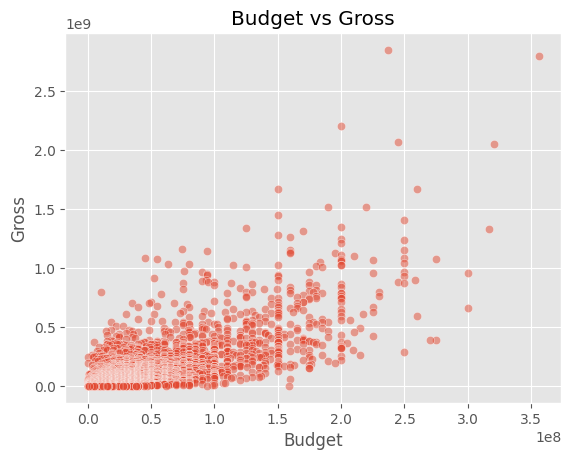

In [22]:
# Budget vs Gross (Not Log transformed

sns.scatterplot(data=numeric_df, x="budget", y="gross", alpha=0.5)
plt.title("Budget vs Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

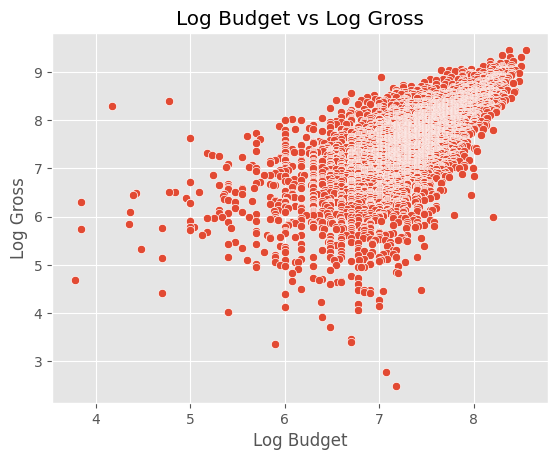

In [23]:
# Log Budget vs Log Gross 

sns.scatterplot(data=numeric_df, x = "log_budget", y="log_gross")
plt.xlabel("Log Budget")
plt.ylabel("Log Gross")
plt.title("Log Budget vs Log Gross")
plt.show()

In [24]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

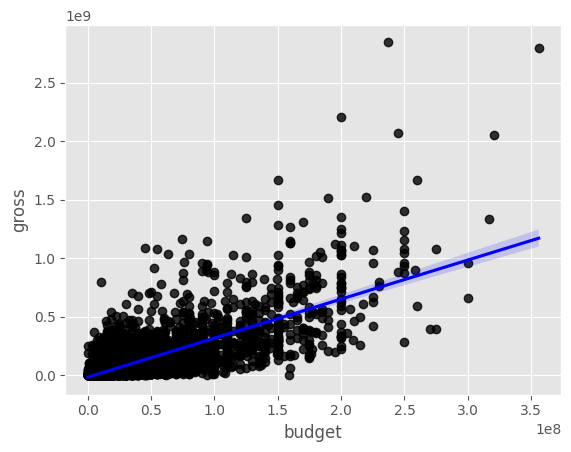

In [25]:
sns.regplot(data=numeric_df, x="budget", y="gross", scatter_kws={"color": "Black"} ,line_kws={"color":"blue"})

<Axes: xlabel='log_budget', ylabel='log_gross'>

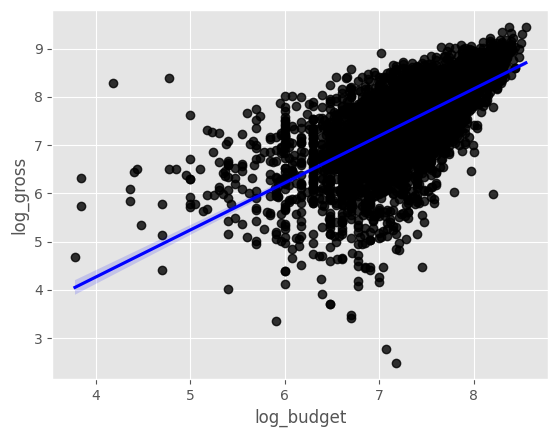

In [27]:
sns.regplot(data=numeric_df, x="log_budget", y="log_gross", scatter_kws={"color":"Black"}, line_kws={"color":"blue"})

In [28]:
numeric_df.corr()

,budget,gross,score,votes,runtime,log_budget,log_gross
budget,1.000000,0.740410,0.071821,0.440035,0.318595,0.757232,0.594430
gross,0.740410,1.000000,0.222100,0.614895,0.275596,0.499609,0.625410
score,0.071821,0.222100,1.000000,0.473789,0.414580,-0.000281,0.187452
votes,0.440035,0.614895,0.473789,1.000000,0.352437,0.329646,0.491030
runtime,0.318595,0.275596,0.414580,0.352437,1.000000,0.334158,0.248433
log_budget,0.757232,0.499609,-0.000281,0.329646,0.334158,1.000000,0.655076
log_gross,0.594430,0.625410,0.187452,0.491030,0.248433,0.655076,1.000000


Text(50.58159722222221, 0.5, 'Movie Features')

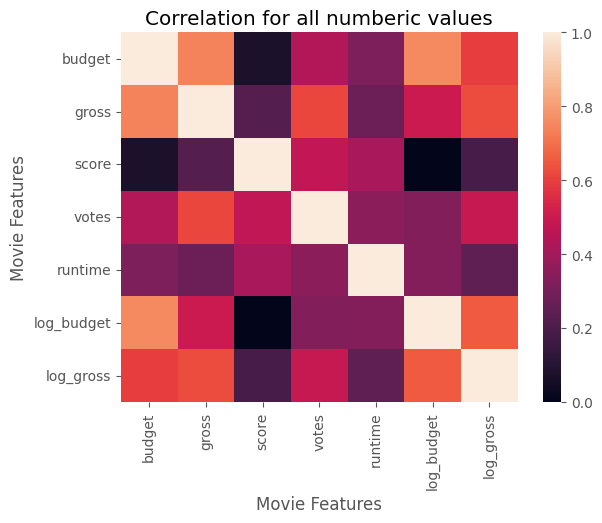

In [30]:
# Let's have a beter look at the correlation.

corr_matrics = numeric_df.select_dtypes(include="number").corr(method="pearson")  #pearson #kendall #spearman

#sns.heatmap(corr_matrics, annot=True)

sns.heatmap(numeric_df.corr())

plt.title("Correlation for all numberic values")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

Observation

Budget → log correlation with gross: 0.65 → strongest numeric predictor

Vote count → correlation with gross: 0.49 → second strongest numeric association


This tells us:

Movies with higher budgets tend to make more revenue (primary driver)

Movies with more audience engagement (vote count) also tend to earn more (secondary driver)

Other numeric variables like ratings or runtime show weaker correlations in comparison

* While the raw budget–gross correlation appears stronger (0.74), this value is influenced by extreme high-budget blockbusters. After log transformation, the correlation decreases to 0.65, reflecting a more robust and representative relationship across the full range of films.

* Summery of numeric values vs Gross Revenue:
    - Among numeric factors, budget exhibits the strongest association with gross revenue (log-scale correlation = 0.65), followed by vote count (correlation = 0.49). This suggests that both investment and audience engagement contribute to revenue, with budget being the dominant factor.

#### Production Company vs Gross Revenue

Examine how revenue varies across production companies, while considering only movies with known budget and revenue.

In [31]:
df["company"].unique().shape

(2386,)

There are 2386 different companies in this data set makeing multiple films.

In [32]:
df["company"].value_counts().head()

company
Universal Pictures       377
Warner Bros.             334
Columbia Pictures        332
Paramount Pictures       320
Twentieth Century Fox    240
Name: count, dtype: int64

In [33]:
# Pick top compaies only.

top_companies = df["company"].dropna().value_counts().head(10).index
top_companies

Index(['Universal Pictures', 'Warner Bros.', 'Columbia Pictures',
       'Paramount Pictures', 'Twentieth Century Fox', 'New Line Cinema',
       'Touchstone Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Walt Disney Pictures', 'TriStar Pictures'],
      dtype='object', name='company')

In [34]:
company_df = df[df["company"].isin(top_companies) & df["gross"].notna()]
company_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0


In [35]:
# Compute summary statistics

company_stats = company_df.groupby("company")["gross"].agg(["count", "mean", "median"]).sort_values(by="mean", ascending=False)
company_stats

,count,mean,median
company,,,
Walt Disney Pictures,123,2.953487e+08,154856263.0
Warner Bros.,333,1.696439e+08,70067909.0
Twentieth Century Fox,240,1.677377e+08,81909769.0
Universal Pictures,376,1.396654e+08,71090349.5
Columbia Pictures,332,1.295450e+08,66722651.0
Paramount Pictures,319,1.269392e+08,60527873.0
New Line Cinema,174,1.142747e+08,48333945.0
Touchstone Pictures,132,8.936237e+07,57014505.0
Metro-Goldwyn-Mayer (MGM),123,7.504252e+07,22365133.0


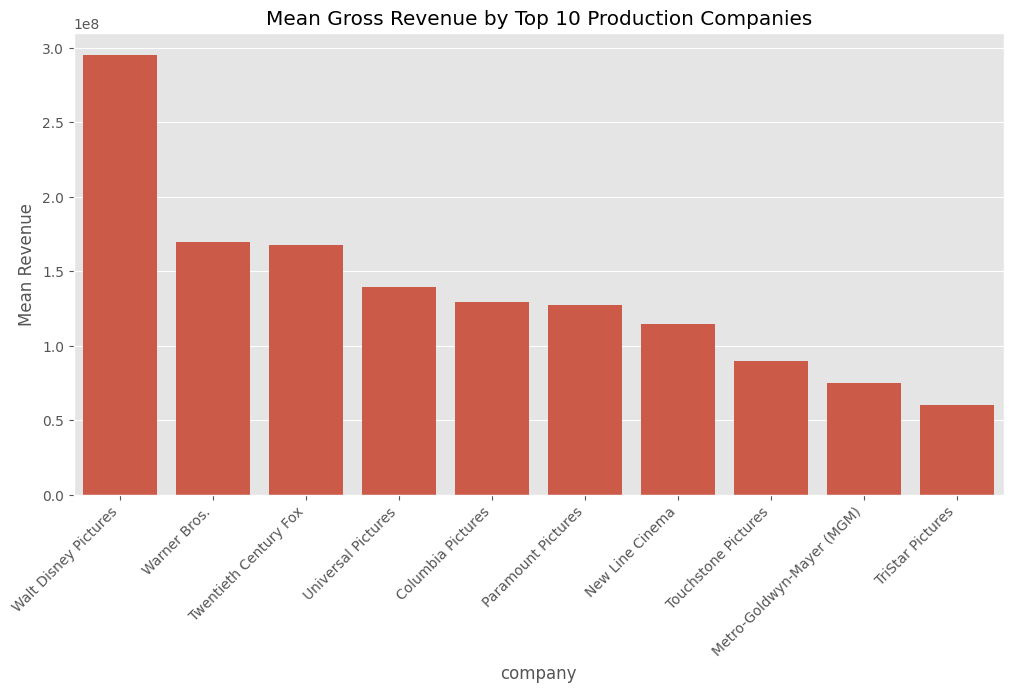

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x=company_stats.index, y=company_stats["mean"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean Revenue")
plt.title("Mean Gross Revenue by Top 10 Production Companies")
plt.show()

Note: 

Revenue is quite different across the top production companies. Some companies make movies that usually earn a lot, while others make movies that earn less on average. We only looked at companies with enough movies to avoid misleading results.

Company matters, but it works best together with numeric factors like budget to understand what drives revenue.

### Overall Analysis Summary

We looked at what affects a movie’s revenue. Bigger budgets usually lead to higher earnings, especially when we adjust for really large or small budgets using a log scale. Movies with more audience votes also tend to make more money. The production company matters too - some top companies consistently make movies that earn a lot, while others earn less. The year a movie was released shows a general upward trend, but mainly reflects overall industry growth.

Some data is missing for budget, revenue, rating, or company because this information isn’t always publicly available.

Takeaway: Budget and audience engagement are the main factors that drive revenue, while company and year give extra context.